# Part 2: Commands

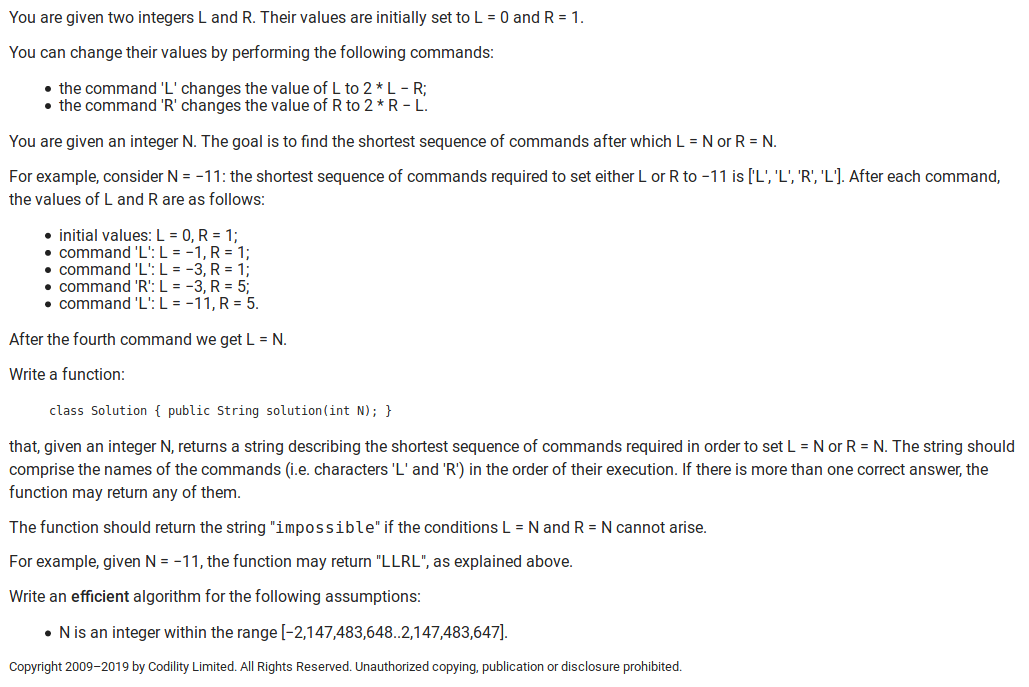

In [1]:
# you can write to stdout for debugging purposes, e.g.
# print("this is a debug message")

def summarium(N):
    for i in range(32):
        if 2**i >= abs(N):
            return 2**i
            
def pairum(N):
    if N < 0:
        L = N
        R = summarium(N) + N
    else:
        L = -summarium(N) + N
        R = N
    return L, R
    
    
sign = lambda x: (1, -1)[x <= 0]
            
def solution(N):
    # write your code in Python 3.6
    
    path = []
    L, R = pairum(N)
    
    for i in range(32):
        
        M = int( (L+R) / 2 )
        
        #print(L, M, R)
    
        if sign(M) != sign(R):
            path.append('L')
            L = M
        else:
            path.append('R')
            R = M
            
        if L == 0 and R == 1:
            return ''.join(reversed(path))
        
    return 'impossible'

In [2]:
solution(-11)

'LLRL'

### Unit Test

In [3]:
import itertools
import random

In [4]:
def evaluate_commands(S):
    L, R = 0, 1
    for s in S:
        if s == 'L':
            L = 2*L - R
        elif s == 'R':
            R = 2*R - L
        else:
            raise ValueError()
    return L, R

In [5]:
def solution_brute(N):
    for i in range(abs(N)):
        prod = list(itertools.product(['L', 'R'], repeat=i))
        prod = [''.join(p) for p in prod]
        for S in prod:
            L, R = evaluate_commands(S)
            #print(S, L, R)
            if L == N or R == N:
                return S
    return 'impossible'

In [6]:
for i in range(1000):
    N = random.randint(-1000, 1000)
    sol_bf = solution_brute(N)
    sol_my = solution(N)
    #print(N, sol_bf, sol_my)
    if sol_bf != sol_my:
        print(N, sol_bf, sol_my)

-256 RRRRRRRRL impossible
-64 RRRRRRL impossible
-64 RRRRRRL impossible
-16 RRRRL impossible
-4 RRL impossible
1  L
